In [225]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# import tensorflow as tf
# import xgboost as xgb
import os
import warnings
# from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout, RepeatVector.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, ccf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from math import sqrt

## 1. Exploration and Cleaning

### 1.1 Energy dataset

In [226]:
df = pd.read_csv("../data/raw/train.csv")

In [227]:
df.head()

,time,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,...,seville_wind_deg,seville_rain_1h,seville_rain_3h,seville_snow_3h,seville_clouds_all,seville_weather_id,seville_weather_main,seville_weather_description,seville_weather_icon,price_actual
0,2015-01-02 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,33,0.0,0.0,0.0,0,800,clear,sky is clear,01n,64.02
1,2015-01-02 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,33,0.0,0.0,0.0,0,800,clear,sky is clear,01n,58.46
2,2015-01-02 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,44,0.0,0.0,0.0,0,800,clear,sky is clear,01n,54.70
3,2015-01-02 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,44,0.0,0.0,0.0,0,800,clear,sky is clear,01n,54.91
4,2015-01-02 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,44,0.0,0.0,0.0,0,800,clear,sky is clear,01n,53.07


In [228]:
df_energy = df.loc[:, 'time':'total_load_actual']
df_energy['price_actual'] = df['price_actual']
df_energy.head()

,time,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,total_load_actual,price_actual
0,2015-01-02 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,64.02
1,2015-01-02 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,58.46
2,2015-01-02 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,54.70
3,2015-01-02 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,54.91
4,2015-01-02 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,53.07


In [229]:
df_energy.describe().round(2)

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,total_load_actual,price_actual
count,26259.00,26260.00,26260.00,26260.00,26259.00,26259.00,26259.00,26260.00,26261.00,26260.00,26260.00,26260.00,26259.00,26260.00,26243.00,26280.00
mean,399.15,480.26,5559.83,4447.48,303.81,504.32,888.15,2507.80,6323.68,62.50,81.56,1453.89,259.71,5419.24,28579.64,56.03
std,89.90,365.33,2272.02,2027.88,54.04,804.87,369.51,1869.15,827.94,21.45,13.35,1687.31,51.29,3176.68,4549.53,14.34
min,0.00,0.00,1518.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18041.00,9.33
25%,341.00,0.00,4071.00,2624.00,268.00,0.00,595.00,955.00,5900.00,53.00,71.00,78.00,225.00,2939.75,24702.50,47.62
50%,378.00,564.00,4866.00,4764.00,303.00,90.00,795.00,1991.00,6734.00,58.00,81.00,630.00,267.00,4811.00,28823.00,55.93
75%,480.00,863.00,6264.00,6107.00,336.00,696.00,1148.00,3666.00,7071.00,84.00,92.00,2635.00,300.00,7298.00,32013.00,65.19
max,592.00,999.00,20034.00,8359.00,449.00,4523.00,1939.00,9389.00,7116.00,106.00,115.00,5792.00,357.00,17436.00,41015.00,116.80


In [230]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         26280 non-null  object 
 1   generation_biomass                           26259 non-null  float64
 2   generation_fossil_brown_coal/lignite         26260 non-null  float64
 3   generation_fossil_gas                        26260 non-null  float64
 4   generation_fossil_hard_coal                  26260 non-null  float64
 5   generation_fossil_oil                        26259 non-null  float64
 6   generation_hydro_pumped_storage_consumption  26259 non-null  float64
 7   generation_hydro_run_of_river_and_poundage   26259 non-null  float64
 8   generation_hydro_water_reservoir             26260 non-null  float64
 9   generation_nuclear                           26261 non-null  float64
 10

In [231]:
# Convert time to datetime object and set it as index

df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True, infer_datetime_format=True)
df_energy = df_energy.set_index('time')


/var/folders/jm/d5139v5927v4y1v50jy6dxr00000gn/T/ipykernel_1810/2832547345.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True, infer_datetime_format=True)


In [232]:
df_energy.head()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,total_load_actual,price_actual
time,,,,,,,,,,,,,,,,
2015-01-01 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,64.02
2015-01-02 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,58.46
2015-01-02 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,54.70
2015-01-02 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,54.91
2015-01-02 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,53.07


In [233]:
# Find NaNs and duplicates in df_energy

print('There are {} missing values or NaNs in df_energy.'
      .format(df_energy.isnull().values.sum()))

temp_energy = df_energy.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_energy based on all columns.'
      .format(temp_energy))

There are 321 missing values or NaNs in df_energy.
There are 0 duplicate rows in df_energy based on all columns.


In [234]:
# Find the number of NaNs in each column

df_energy.isnull().sum(axis=0)

generation_biomass                             21
generation_fossil_brown_coal/lignite           20
generation_fossil_gas                          20
generation_fossil_hard_coal                    20
generation_fossil_oil                          21
generation_hydro_pumped_storage_consumption    21
generation_hydro_run_of_river_and_poundage     21
generation_hydro_water_reservoir               20
generation_nuclear                             19
generation_other                               20
generation_other_renewable                     20
generation_solar                               20
generation_waste                               21
generation_wind_onshore                        20
total_load_actual                              37
price_actual                                    0
dtype: int64

In [235]:
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series 
    created by the user. The user can define either the 'df' and the 'column' 
    or the 'series' and additionally, can also define the 'label', the 
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

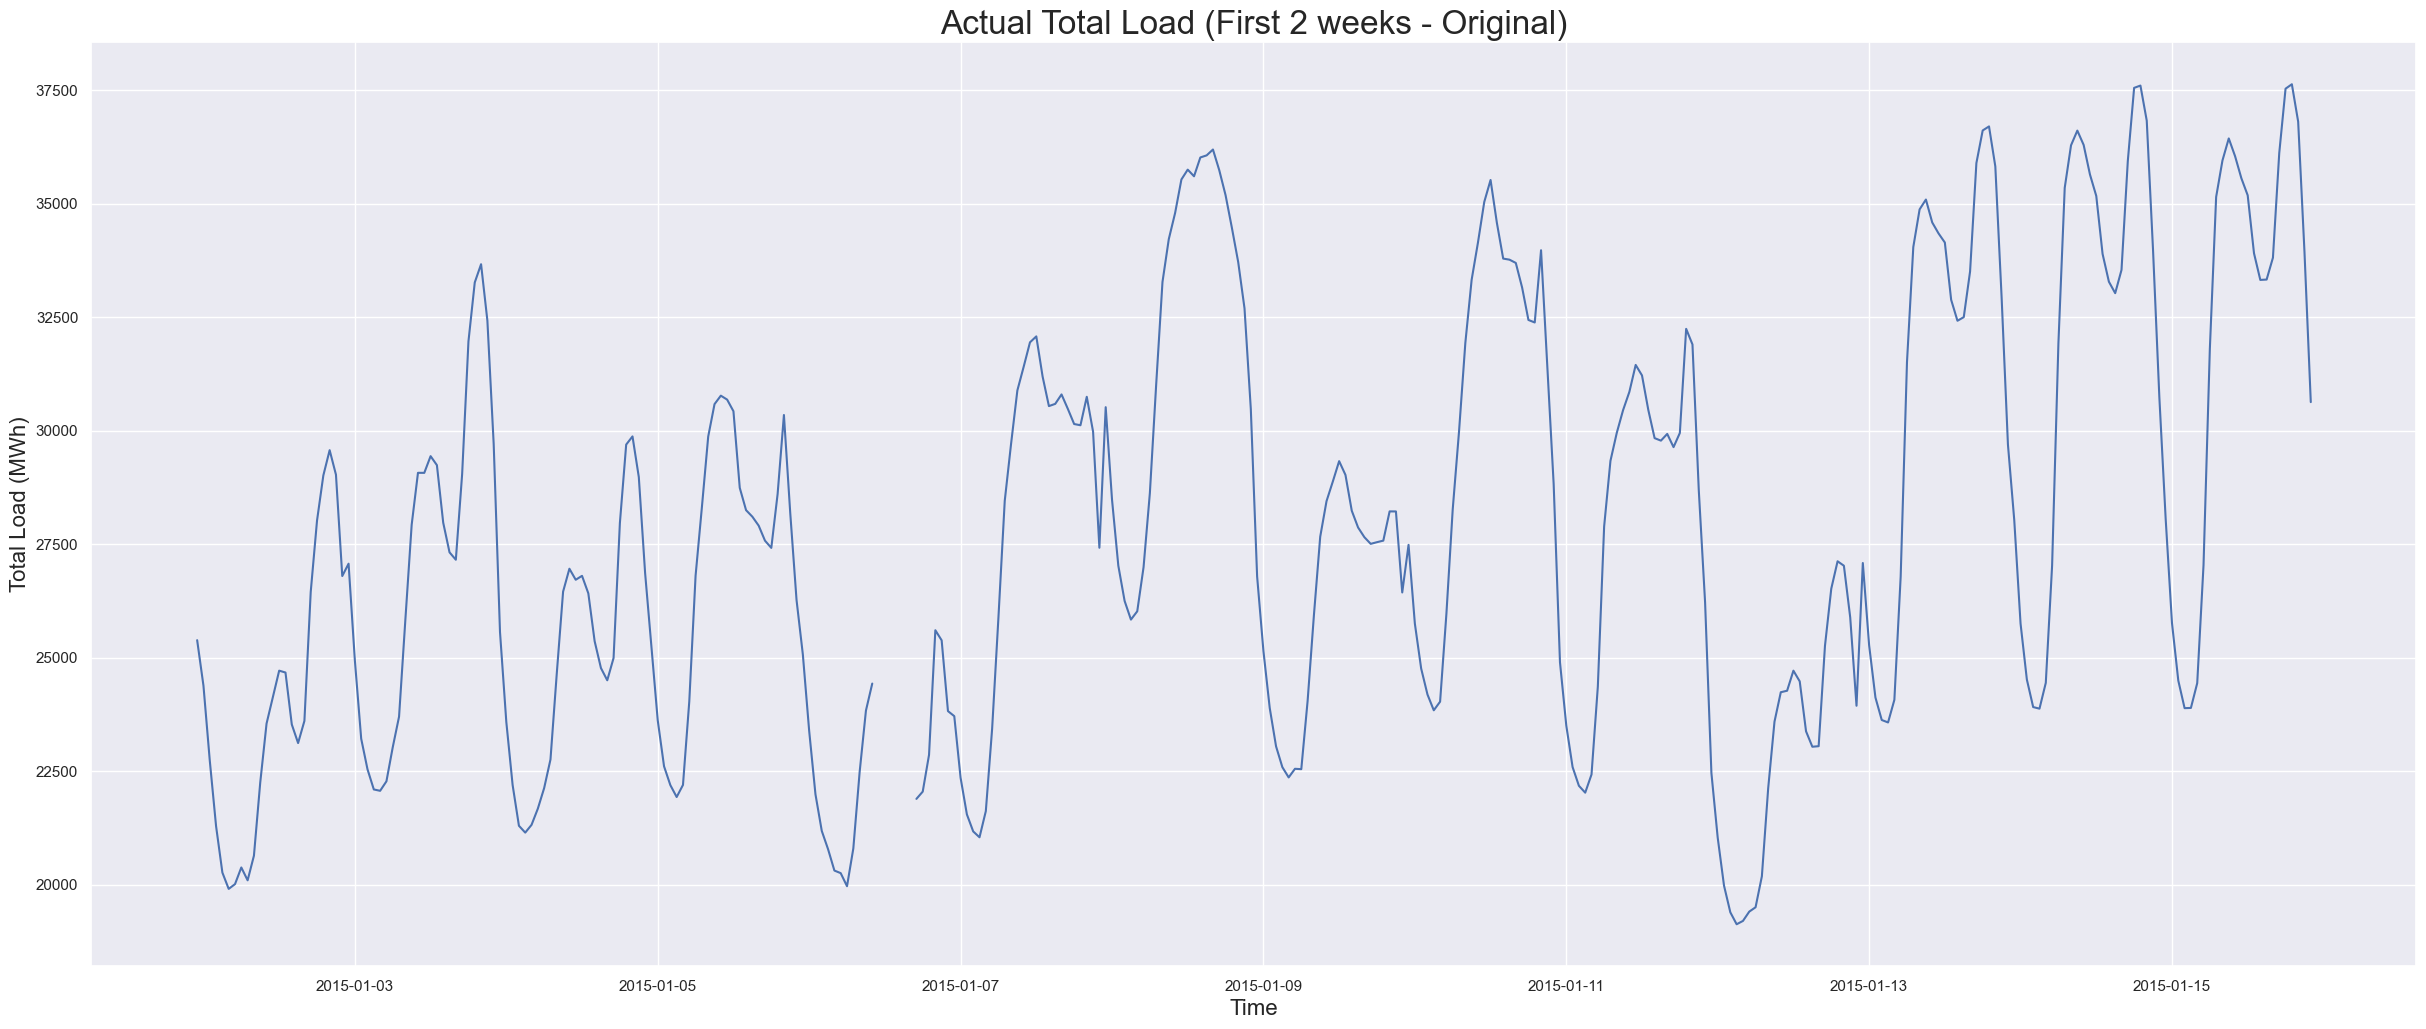

In [236]:
# Zoom into the plot of the hourly (actual) total load

ax = plot_series(df=df_energy, column='total_load_actual', ylabel='Total Load (MWh)',
                 title='Actual Total Load (First 2 weeks - Original)', end=24*7*2)
plt.show()

In [237]:
# Display the rows with null values

df_energy[df_energy.isnull().any(axis=1)].tail()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,total_load_actual,price_actual
time,,,,,,,,,,,,,,,,
2016-10-28 21:00:00+00:00,351.0,554.0,7176.0,5690.0,321.0,NaN,417.0,1295.0,6967.0,58.0,91.0,70.0,299.0,3193.0,26583.0,58.70
2016-11-24 03:00:00+00:00,NaN,900.0,4838.0,4547.0,269.0,1413.0,795.0,435.0,5040.0,60.0,85.0,15.0,227.0,4598.0,23112.0,51.22
2017-03-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.40
2017-11-15 11:00:00+00:00,0.0,0.0,10064.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,73.76
2017-11-15 18:00:00+00:00,0.0,0.0,12336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,83.39


In [238]:
# Fill null values using interpolation

df_energy.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

In [239]:
# Display the number of non-zero values in each column

print('Non-zero values in each column:\n', df_energy.astype(bool).sum(axis=0), sep='\n')

Non-zero values in each column:

generation_biomass                             26277
generation_fossil_brown_coal/lignite           18939
generation_fossil_gas                          26280
generation_fossil_hard_coal                    26277
generation_fossil_oil                          26277
generation_hydro_pumped_storage_consumption    16781
generation_hydro_run_of_river_and_poundage     26277
generation_hydro_water_reservoir               26277
generation_nuclear                             26277
generation_other                               26277
generation_other_renewable                     26277
generation_solar                               26277
generation_waste                               26277
generation_wind_onshore                        26277
total_load_actual                              26280
price_actual                                   26280
dtype: int64


### 1.2 Weather dataset

In [240]:
df.head()

,time,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,...,seville_wind_deg,seville_rain_1h,seville_rain_3h,seville_snow_3h,seville_clouds_all,seville_weather_id,seville_weather_main,seville_weather_description,seville_weather_icon,price_actual
0,2015-01-02 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,33,0.0,0.0,0.0,0,800,clear,sky is clear,01n,64.02
1,2015-01-02 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,33,0.0,0.0,0.0,0,800,clear,sky is clear,01n,58.46
2,2015-01-02 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,44,0.0,0.0,0.0,0,800,clear,sky is clear,01n,54.70
3,2015-01-02 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,44,0.0,0.0,0.0,0,800,clear,sky is clear,01n,54.91
4,2015-01-02 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,44,0.0,0.0,0.0,0,800,clear,sky is clear,01n,53.07


In [241]:
df_weather = df.drop(columns=['generation_biomass', 'generation_fossil_brown_coal/lignite', 'generation_fossil_gas', 'generation_fossil_hard_coal', 'generation_fossil_oil', 'generation_hydro_pumped_storage_consumption', 'generation_hydro_run_of_river_and_poundage', 'generation_hydro_water_reservoir', 'generation_nuclear', 'generation_other', 'generation_other_renewable', 'generation_solar', 'generation_waste', 'generation_wind_onshore', 'total_load_actual', 'price_actual']) \
                .rename(columns={'time': 'dt_iso'})
df_weather.head()

,dt_iso,valencia_temp,valencia_temp_min,valencia_temp_max,valencia_pressure,valencia_humidity,valencia_wind_speed,valencia_wind_deg,valencia_rain_1h,valencia_rain_3h,...,seville_wind_speed,seville_wind_deg,seville_rain_1h,seville_rain_3h,seville_snow_3h,seville_clouds_all,seville_weather_id,seville_weather_main,seville_weather_description,seville_weather_icon
0,2015-01-02 00:00:00+01:00,271.229,271.229,271.229,1006,82,1,265,0.0,0.0,...,2,33,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-02 01:00:00+01:00,271.229,271.229,271.229,1006,82,1,265,0.0,0.0,...,2,33,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-02 02:00:00+01:00,270.664,270.664,270.664,1005,82,1,275,0.0,0.0,...,3,44,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-02 03:00:00+01:00,270.664,270.664,270.664,1005,82,1,275,0.0,0.0,...,3,44,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-02 04:00:00+01:00,270.664,270.664,270.664,1005,82,1,275,0.0,0.0,...,3,44,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [242]:
# List of cities to extract
cities = ['valencia', 'madrid', 'bilbao', 'barcelona', 'seville']

# List of feature suffixes (based on one city's columns)
features = ['temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
            'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'weather_id', 'weather_main', 'weather_description', 'weather_icon']

# Collect melted DataFrames
dfs = []

for city in cities:
    city_cols = [f"{city}_{feature}" for feature in features]
    city_df = df_weather[['dt_iso'] + city_cols].copy()
    city_df.columns = ['dt_iso'] + features
    city_df['city'] = city
    dfs.append(city_df)

# Concatenate all city DataFrames vertically
df_weather = pd.concat(dfs, ignore_index=True)


In [243]:
df_weather.head()

,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,city
0,2015-01-02 00:00:00+01:00,271.229,271.229,271.229,1006,82,1,265,0.0,0.0,0.0,0,800,clear,sky is clear,01n,valencia
1,2015-01-02 01:00:00+01:00,271.229,271.229,271.229,1006,82,1,265,0.0,0.0,0.0,0,800,clear,sky is clear,01n,valencia
2,2015-01-02 02:00:00+01:00,270.664,270.664,270.664,1005,82,1,275,0.0,0.0,0.0,0,800,clear,sky is clear,01n,valencia
3,2015-01-02 03:00:00+01:00,270.664,270.664,270.664,1005,82,1,275,0.0,0.0,0.0,0,800,clear,sky is clear,01n,valencia
4,2015-01-02 04:00:00+01:00,270.664,270.664,270.664,1005,82,1,275,0.0,0.0,0.0,0,800,clear,sky is clear,01n,valencia


In [244]:
df_weather.tail()

,dt_iso,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,city
131395,2017-12-31 19:00:00+01:00,289.94,289.15,291.15,1028,72,4,230,0.0,0.0,0.0,40,802,clouds,scattered clouds,03n,seville
131396,2017-12-31 20:00:00+01:00,289.33,288.15,291.15,1029,68,5,260,0.0,0.0,0.0,75,803,clouds,broken clouds,04n,seville
131397,2017-12-31 21:00:00+01:00,288.94,288.15,290.15,1031,72,3,270,0.0,0.0,0.0,40,802,clouds,scattered clouds,03n,seville
131398,2017-12-31 22:00:00+01:00,288.54,288.15,289.15,1032,82,1,320,0.0,0.0,0.0,40,802,clouds,scattered clouds,03n,seville
131399,2017-12-31 23:00:00+01:00,286.94,286.15,288.15,1032,82,1,310,0.0,0.0,0.0,20,801,clouds,few clouds,02n,seville


In [245]:
df_weather.describe().round(2)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,131400.00,131400.00,131400.00,131400.00,131400.00,131400.00,131400.00,131400.00,131400.00,131400.00,131400.00,131400.00
mean,289.86,288.44,291.50,1088.32,67.63,2.43,165.84,0.08,0.00,0.01,24.08,763.79
std,8.08,7.92,8.89,6955.63,22.16,2.13,116.54,0.43,0.01,0.26,30.33,101.45
min,262.24,262.24,262.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
25%,284.05,283.06,285.15,1014.00,52.00,1.00,54.00,0.00,0.00,0.00,0.00,800.00
50%,289.29,288.15,290.93,1018.00,71.00,2.00,172.00,0.00,0.00,0.00,12.00,800.00
75%,295.43,293.71,297.59,1023.00,87.00,3.00,270.00,0.00,0.00,0.00,40.00,801.00
max,315.15,315.15,321.15,1008371.00,100.00,133.00,360.00,12.00,2.32,21.50,100.00,804.00


In [246]:
# Print the type of each variable in df_weather

df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131400 entries, 0 to 131399
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               131400 non-null  object 
 1   temp                 131400 non-null  float64
 2   temp_min             131400 non-null  float64
 3   temp_max             131400 non-null  float64
 4   pressure             131400 non-null  int64  
 5   humidity             131400 non-null  int64  
 6   wind_speed           131400 non-null  int64  
 7   wind_deg             131400 non-null  int64  
 8   rain_1h              131400 non-null  float64
 9   rain_3h              131400 non-null  float64
 10  snow_3h              131400 non-null  float64
 11  clouds_all           131400 non-null  int64  
 12  weather_id           131400 non-null  int64  
 13  weather_main         131400 non-null  object 
 14  weather_description  131400 non-null  object 
 15  weather_icon     

In [247]:
def df_convert_dtypes(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

In [248]:
# Convert columns with int64 type values to float64 type

df_weather = df_convert_dtypes(df_weather, np.int64, np.float64)


In [249]:
# Convert dt_iso to datetime type, rename it and set it as index

df_weather['time'] = pd.to_datetime(df_weather['dt_iso'], utc=True, infer_datetime_format=True)
df_weather = df_weather.drop(['dt_iso'], axis=1)
df_weather = df_weather.set_index('time')

/var/folders/jm/d5139v5927v4y1v50jy6dxr00000gn/T/ipykernel_1810/2189753010.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_weather['time'] = pd.to_datetime(df_weather['dt_iso'], utc=True, infer_datetime_format=True)


In [250]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131400 entries, 2015-01-01 23:00:00+00:00 to 2017-12-31 22:00:00+00:00
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temp                 131400 non-null  float64
 1   temp_min             131400 non-null  float64
 2   temp_max             131400 non-null  float64
 3   pressure             131400 non-null  float64
 4   humidity             131400 non-null  float64
 5   wind_speed           131400 non-null  float64
 6   wind_deg             131400 non-null  float64
 7   rain_1h              131400 non-null  float64
 8   rain_3h              131400 non-null  float64
 9   snow_3h              131400 non-null  float64
 10  clouds_all           131400 non-null  float64
 11  weather_id           131400 non-null  float64
 12  weather_main         131400 non-null  object 
 13  weather_description  131400 non-null  object 
 14  weather_icon         1

In [251]:
# Display average weather features grouped by each city

mean_weather_by_city = (
    df_weather
    .select_dtypes(include='number')
    .groupby(df_weather['city'])
    .mean()
)
mean_weather_by_city


,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
city,,,,,,,,,,,,
barcelona,289.859165,288.450665,291.161777,1378.071766,74.064307,2.869711,190.557686,0.128950,0.000439,0.000000,22.801979,766.351712
bilbao,286.427700,285.022281,287.971307,1017.725419,78.782915,1.851065,158.958638,0.136484,0.001406,0.032087,43.504072,724.132192
madrid,288.427760,287.210132,289.548982,1010.316286,57.413775,2.427397,176.414992,0.037820,0.000176,0.000040,19.484132,773.301484
seville,293.986165,291.639766,297.487977,1019.224543,62.658980,2.424353,149.538661,0.039498,0.000243,0.000000,13.740601,774.138927
valencia,290.599624,289.874906,291.344937,1016.269673,65.244711,2.587443,153.728539,0.040827,0.000300,0.000205,20.856012,781.009932


In [252]:
# Find NaNs and duplicates in df_weather

print('There are {} missing values or NaNs in df_weather.'
      .format(df_weather.isnull().values.sum()))

temp_weather = df_weather.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_weather based on all columns.'
      .format(temp_weather))

There are 0 missing values or NaNs in df_weather.
There are 7799 duplicate rows in df_weather based on all columns.


In [253]:
# Display the number of rows in each dataframe

print('There are {} observations in df_energy.'.format(df_energy.shape[0]))

cities = df_weather['city'].unique()
grouped_weather = df_weather.groupby('city')

for city in cities:
    print('There are {} observations in df_weather'
          .format(grouped_weather.get_group('{}'.format(city)).shape[0]), 
          'about city: {}.'.format(city))

There are 26280 observations in df_energy.
There are 26280 observations in df_weather about city: valencia.
There are 26280 observations in df_weather about city: madrid.
There are 26280 observations in df_weather about city: bilbao.
There are 26280 observations in df_weather about city: barcelona.
There are 26280 observations in df_weather about city: seville.


In [254]:
# Display all the unique values in the column 'weather_description'

weather_description_unique = df_weather['weather_description'].unique()
weather_description_unique

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'proximity thunderstorm',
       'thunderstorm', 'light intensity shower rain',
       'light intensity drizzle', 'thunderstorm with rain', 'fog',
       'smoke', 'drizzle', 'heavy intensity drizzle',
       'proximity shower rain', 'haze', 'light snow', 'rain and snow',
       'light rain and snow', 'snow', 'light intensity drizzle rain',
       'rain and drizzle', 'light shower snow', 'proximity moderate rain',
       'ragged shower rain', 'heavy snow', 'sand dust whirls', 'sleet',
       'proximity drizzle', 'dust', 'light thunderstorm'], dtype=object)

In [255]:
# Display all the unique values in the column 'weather_main'

weather_main_unique = df_weather['weather_main'].unique()
weather_main_unique

array(['clear', 'clouds', 'rain', 'mist', 'thunderstorm', 'drizzle',
       'fog', 'smoke', 'haze', 'snow', 'dust'], dtype=object)

In [256]:
# Display all the unique values in the column 'weather_id'

weather_id_unique = df_weather['weather_id'].unique()
weather_id_unique


array([800., 801., 802., 803., 804., 500., 501., 502., 701., 522., 521.,
       503., 202., 200., 211., 520., 300., 201., 741., 711., 301., 302.,
       721., 600., 616., 615., 601., 310., 311., 620., 531., 602., 731.,
       611., 761., 210.])

In [257]:
# Drop columns with qualitative weather information
df_weather = df_weather.drop(['weather_main', 'weather_id', 
                              'weather_description', 'weather_icon'], axis=1)


In [258]:
# Display the number of duplicates in df_weather

temp_weather = df_weather.reset_index().duplicated(subset=['time', 'city'], 
                                                   keep='first').sum()
print('There are {} duplicate rows in df_weather ' \
      'based on all columns except "time" and "city_name".'.format(temp_weather))

There are 0 duplicate rows in df_weather based on all columns except "time" and "city_name".


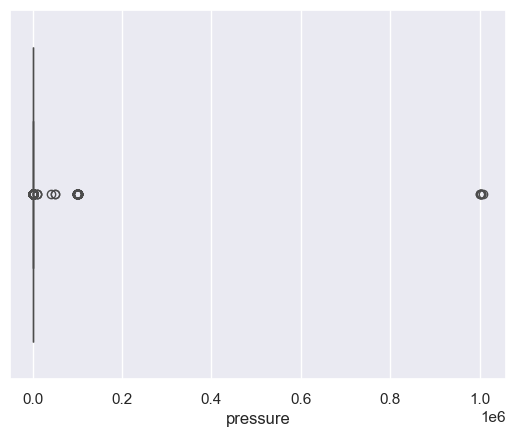

In [259]:
# Check for outliers in 'pressure' column

sns.boxplot(x=df_weather['pressure'])
plt.show()

In [260]:
# Replace outliers in 'pressure' with NaNs

df_weather.loc[df_weather.pressure > 1051, 'pressure'] = np.nan
df_weather.loc[df_weather.pressure < 931, 'pressure'] = np.nan

In [261]:
print(df_weather.columns[df_weather.columns.duplicated()])


Index([], dtype='object')


In [262]:
df_weather.index[df_weather.index.duplicated()]

DatetimeIndex(['2015-01-01 23:00:00+00:00', '2015-01-02 00:00:00+00:00',
               '2015-01-02 01:00:00+00:00', '2015-01-02 02:00:00+00:00',
               '2015-01-02 03:00:00+00:00', '2015-01-02 04:00:00+00:00',
               '2015-01-02 05:00:00+00:00', '2015-01-02 06:00:00+00:00',
               '2015-01-02 07:00:00+00:00', '2015-01-02 08:00:00+00:00',
               ...
               '2017-12-31 13:00:00+00:00', '2017-12-31 14:00:00+00:00',
               '2017-12-31 15:00:00+00:00', '2017-12-31 16:00:00+00:00',
               '2017-12-31 17:00:00+00:00', '2017-12-31 18:00:00+00:00',
               '2017-12-31 19:00:00+00:00', '2017-12-31 20:00:00+00:00',
               '2017-12-31 21:00:00+00:00', '2017-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='time', length=105120, freq=None)

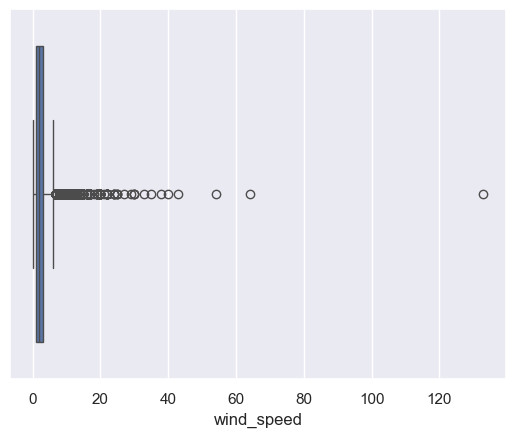

In [263]:
# Check for outliers in 'wind_speed' column

sns.boxplot(x=df_weather['wind_speed'])
plt.show()

In [264]:
# Replace outliers in 'wind_speed' with NaNs

df_weather.loc[df_weather.wind_speed > 50, 'wind_speed'] = np.nan

In [265]:
# Fill null values using interpolation

df_weather.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

/var/folders/jm/d5139v5927v4y1v50jy6dxr00000gn/T/ipykernel_1810/3371874962.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_weather.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)


### 1.3 Merging the two datasets

In [266]:
# Split the df_weather into 5 dataframes (one for each city)

df_1, df_2, df_3, df_4, df_5 = [x for _, x in df_weather.groupby('city')]
dfs = [df_1, df_2, df_3, df_4, df_5]

In [267]:
df_energy.head()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,generation_other_renewable,generation_solar,generation_waste,generation_wind_onshore,total_load_actual,price_actual
time,,,,,,,,,,,,,,,,
2015-01-01 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,64.02
2015-01-02 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,58.46
2015-01-02 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,54.70
2015-01-02 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,54.91
2015-01-02 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,53.07


In [268]:
df_weather.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,city
time,,,,,,,,,,,,
2015-01-01 23:00:00+00:00,271.229,271.229,271.229,1006.0,82.0,1.0,265.0,0.0,0.0,0.0,0.0,valencia
2015-01-02 00:00:00+00:00,271.229,271.229,271.229,1006.0,82.0,1.0,265.0,0.0,0.0,0.0,0.0,valencia
2015-01-02 01:00:00+00:00,270.664,270.664,270.664,1005.0,82.0,1.0,275.0,0.0,0.0,0.0,0.0,valencia
2015-01-02 02:00:00+00:00,270.664,270.664,270.664,1005.0,82.0,1.0,275.0,0.0,0.0,0.0,0.0,valencia
2015-01-02 03:00:00+00:00,270.664,270.664,270.664,1005.0,82.0,1.0,275.0,0.0,0.0,0.0,0.0,valencia


In [269]:
# Merge all dataframes into the final dataframe

df_final = df_energy

for df in dfs:
    city = df['city'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    df_final = df_final.merge(df, on=['time'], how='outer')
    df_final = df_final.drop('city_{}'.format(city_str), axis=1)
    
df_final.columns

Index(['generation_biomass', 'generation_fossil_brown_coal/lignite',
       'generation_fossil_gas', 'generation_fossil_hard_coal',
       'generation_fossil_oil', 'generation_hydro_pumped_storage_consumption',
       'generation_hydro_run_of_river_and_poundage',
       'generation_hydro_water_reservoir', 'generation_nuclear',
       'generation_other', 'generation_other_renewable', 'generation_solar',
       'generation_waste', 'generation_wind_onshore', 'total_load_actual',
       'price_actual', 'temp_barcelona', 'temp_min_barcelona',
       'temp_max_barcelona', 'pressure_barcelona', 'humidity_barcelona',
       'wind_speed_barcelona', 'wind_deg_barcelona', 'rain_1h_barcelona',
       'rain_3h_barcelona', 'snow_3h_barcelona', 'clouds_all_barcelona',
       'temp_bilbao', 'temp_min_bilbao', 'temp_max_bilbao', 'pressure_bilbao',
       'humidity_bilbao', 'wind_speed_bilbao', 'wind_deg_bilbao',
       'rain_1h_bilbao', 'rain_3h_bilbao', 'snow_3h_bilbao',
       'clouds_all_bilbao', 't

In [270]:
# Display the number of NaNs and duplicates in the final dataframe

print('There are {} missing values or NaNs in df_final.'
      .format(df_final.isnull().values.sum()))

temp_final = df_final.duplicated(keep='first').sum()

print('\nThere are {} duplicate rows in df_energy based on all columns.'
      .format(temp_final))

There are 0 missing values or NaNs in df_final.

There are 0 duplicate rows in df_energy based on all columns.


In [271]:
df_final.head()

,generation_biomass,generation_fossil_brown_coal/lignite,generation_fossil_gas,generation_fossil_hard_coal,generation_fossil_oil,generation_hydro_pumped_storage_consumption,generation_hydro_run_of_river_and_poundage,generation_hydro_water_reservoir,generation_nuclear,generation_other,...,temp_min_valencia,temp_max_valencia,pressure_valencia,humidity_valencia,wind_speed_valencia,wind_deg_valencia,rain_1h_valencia,rain_3h_valencia,snow_3h_valencia,clouds_all_valencia
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,...,271.229,271.229,1006.0,82.0,1.0,265.0,0.0,0.0,0.0,0.0
2015-01-02 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,...,271.229,271.229,1006.0,82.0,1.0,265.0,0.0,0.0,0.0,0.0
2015-01-02 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,...,270.664,270.664,1005.0,82.0,1.0,275.0,0.0,0.0,0.0,0.0
2015-01-02 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,...,270.664,270.664,1005.0,82.0,1.0,275.0,0.0,0.0,0.0,0.0
2015-01-02 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,...,270.664,270.664,1005.0,82.0,1.0,275.0,0.0,0.0,0.0,0.0
